In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras
!export KERAS_BACKEND=tensorflow
from keras.datasets import mnist
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Dropout
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random

In [0]:
###############
# Import data #
###############
np.random.seed(0)
(X_train, y_train), (X_test, y_test)= mnist.load_data()

In [0]:
##########################
# Validate imported data #
##########################
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
 

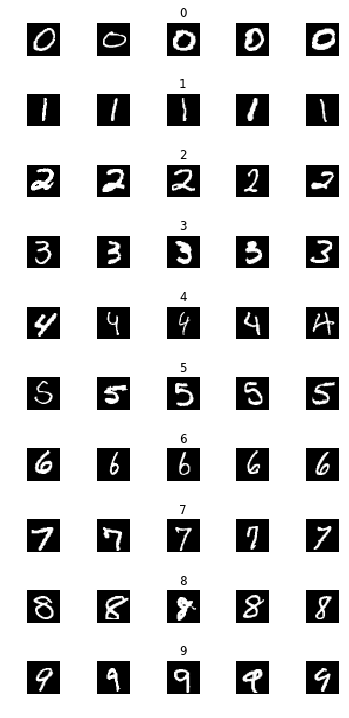

In [58]:
###################################
# Plot some images of train data  #
###################################
num_of_samples=[]
 
cols = 5
num_of_classes = 10
 
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()
 
for i in range(cols):
    for j in range(num_classes):
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j))
        num_of_samples.append(len(x_selected))



[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


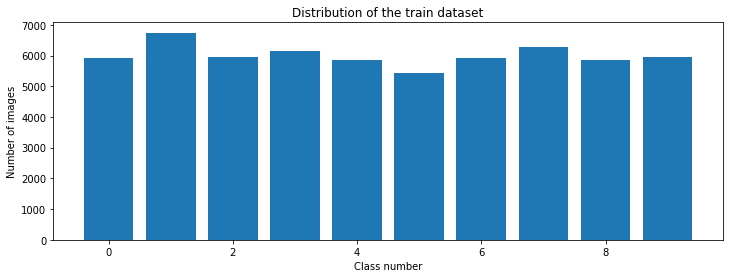

In [59]:
###################################
# Plot some images of train data  #
###################################
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [0]:
####################
# One hot encoding #
####################
# CHANGE: Add depth to our images
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

##################
# Normalize data #
##################
X_train = X_train/255
X_test = X_test/255

In [0]:
####################
# CNN LeNet model  #
####################
def create_leNet():
  model = Sequential()
  # > 30 filters is efective
  # > strides = kernel step how much kernel is translated (the smaller the more computations)
  # > padding = to preserve the spatial dim. input size = output size. Here no padding since letters are centered 
  #   no interesting to preserve outer info
  # * input size = 28 x 28 x 1(depth) => parameters to train = 1(no. images) * 30 (no. filters) * 25 (since 5x5 =  25 the filter)  + 30 (biases) = 780
  # * output size = 24 x 24 x 30 (depth) due to the 5x5 filter
  model.add(Conv2D(30,(5,5), input_shape = (28,28,1), activation = 'relu'))
  # * input size = 24 x 24 x 30 (depth)
  # * output size = 12 x 12 x 30 (depth)
  model.add(MaxPooling2D(pool_size = (2,2)))
  # * input size = 12 x 12 x 30 (depth) => parameters = 30 (no. images) * 15(no. filters) * 9 (3x3 the filter) + 15 (biases) = 4065
  # * output size = 10 x 10 x 15 (depth)
  model.add(Conv2D(15,(3,3), activation = 'relu'))
  # * input size = 10 x 10 x 15 (depth)
  # * output size = 5 x 5 x 15 (depth)
  model.add(MaxPooling2D(pool_size = (2,2)))
  # * input size = 5 x 5 x 15 (depth)
  # * output size = 375
  model.add(Flatten())
  model.add(Dense(500, activation = 'relu'))
  # Dropout Layer: Randomly sets nodes turned off, at each update during training, forces the network to use various combiantions of nodes
  # to classify the same data, forces to learn in more independent way [uniformly distributed]
  model.add(Dropout(0.5))
  model.add(Dense(num_of_classes, activation = 'softmax'))
  model.compile(Adam(lr=0.01), 'categorical_crossentropy', metrics=['accuracy'])
  return model
  
  
  

In [62]:
model = create_leNet()
history = model.fit(x = X_train, y = y_train, epochs = 30, validation_split = 0.1, batch_size = 400,verbose = 1, shuffle = 'true')

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 54000 samples, validate on 6000 samples
Epoch 1/30
54000/54000 [==============================] - 3s 48us/step - loss: 0.2477 - acc: 0.9197 - val_loss: 0.0509 - val_acc: 0.9842
Epoch 2/30
54000/54000 [==============================] - 2s 37us/step - loss: 0.0707 - acc: 0.9779 - val_loss: 0.0375 - val_acc: 0.9883
Epoch 3/30
54000/54000 [==============================] - 2s 37us/step - loss: 0.0574 - acc: 0.9820 - val_loss: 0.0403 - val_acc: 0.9885
Epoch 4/30
54000/54000 [==============================] - 2s 37us/step - loss: 0.0502 - acc: 0.9844 - val_loss: 0.0406 - val_acc: 0.9882
Epoch 5/30
54000/54000 [==============================] - 2s 36us/step - loss: 0.0449 - acc: 0.9860 - val_loss: 0.0364 - val_acc: 0.9898
Epoch 6/30
54000/54000 [==============================] - 2s 37us/step - loss: 0.0420 - acc: 0.9870 - val_loss: 0.0331 - val_acc: 0.9907
Epoch 7/30
540

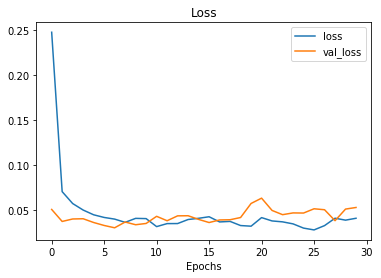

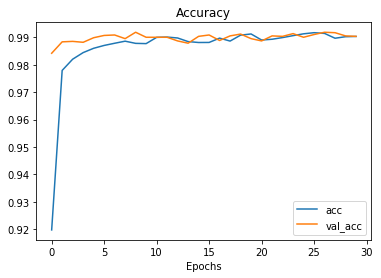

In [63]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('Epochs')
plt.show() 

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.show() 

Prediction for image '3' is : [3]


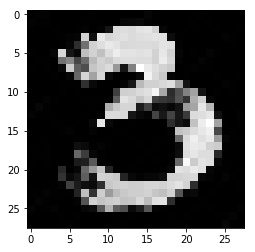

In [64]:
###########################
#   Evaluate Model pt.1   #
###########################
######################
#   Import new image #
######################
import requests
from PIL import Image
url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcST8KzXHtkSHcxzdpnllMhAj0upLEwnNFdtY6j4YUPcmaf4Ty3u'
response = requests.get(url, stream = True)
img = Image.open(response.raw)
plt.imshow(img)

                
######################
#   Gray scale image #
######################
import cv2
img_array = np.asarray(img)
resized_img = cv2.resize(img_array, (28,28))
gray_img = cv2.cvtColor(resized_img, cv2.COLOR_RGB2GRAY)
image = cv2.bitwise_not(gray_img)
plt.imshow(image, cmap = plt.get_cmap("gray"))

###############################
#   Prediction for the  image #
###############################
image = image/255
image = image.reshape(1, 28,28,1)
predicted_digit = model.predict_classes(image)


print("Prediction for image '3' is :", str(predicted_digit))

In [65]:
########################
#  Evaluate Model pt.2 #
########################
score = model.evaluate(X_test, y_test, verbose = 0)
print("Test score is : ",score[0])
print("Test accuracy is : ",score[1])

Test score is :  0.057374092908673444
Test accuracy is :  0.9896


In [72]:
# Print exactly what our Convolutional Layers are seeing
layer1 = Model(inputs = model.layers[0].input, outputs = model.layers[0].output)
layer2 = Model(inputs = model.layers[0].input, outputs = model.layers[2].output)


visual_layer1 = layer1.predict(image)
visual_layer2 = layer2.predict(image)

print(visual_layer1.shape)
print(visual_layer2.shape)

(1, 24, 24, 30)
(1, 10, 10, 15)


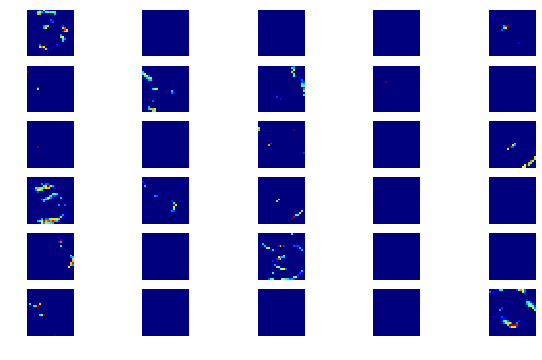

In [74]:
plt.figure(figsize = (10,6))
for i in range(30):
  plt.subplot(6,5, i + 1)
  plt.imshow(visual_layer1[0,:, :, i], cmap = plt.get_cmap("jet"))
  plt.axis("off")

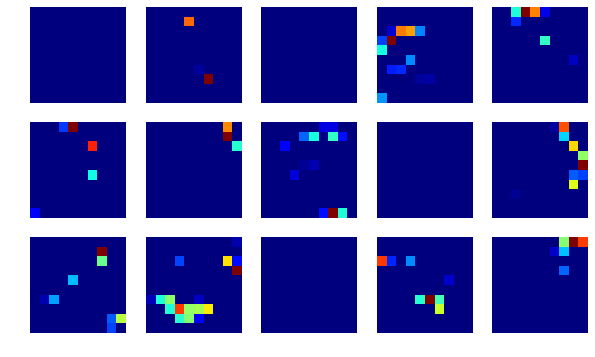

In [75]:
plt.figure(figsize = (10,6))
for i in range(15):
  plt.subplot(3,5, i + 1)
  plt.imshow(visual_layer2[0,:, :, i], cmap = plt.get_cmap("jet"))
  plt.axis("off")